In [1]:
import numpy as np
import netCDF4
import scipy
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.image as image
import matplotlib

In [2]:
def latent_space_analysis(Images, title, iden):
    mean_image = np.mean(Images, axis=0)
    var_image = np.std(Images, axis=0)
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,2, figsize=(16,2))
    cs0 = ax[0].imshow(var_image, cmap=cmap)
    ax[0].set_title("Image Standard Deviation")
    cs1 = ax[1].imshow(mean_image, cmap=cmap)
    ax[1].set_title("Image Mean")
    ax[0].set_ylim(ax[0].get_ylim()[::-1])
    ax[1].set_ylim(ax[1].get_ylim()[::-1])
    ax[1].set_xlabel("CRMs")
    ax[0].set_xlabel("CRMs")
    ax[0].set_ylabel("Pressure")
    ax[1].set_yticks([])
    y_ticks = np.arange(1300, 0, -300)
    ax[0].set_yticklabels(y_ticks)
    ax[1].set_yticklabels(y_ticks)
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs0, cax=cax)
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs1, cax=cax)
    plt.suptitle(title)
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space_components/"+iden+'_'+title+'.png')

In [5]:
idn = '31'
z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Saved_Data/Var_Latent_Space__31.npy")

Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_W_Test.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")
Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))
elbo = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Saved_Data/50_50_Centered_31_elbo.npy")

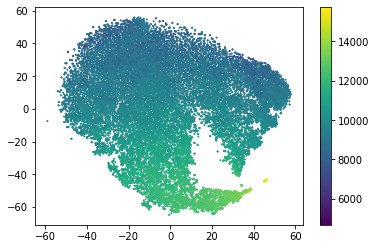

In [6]:
plt.scatter(x=z_test_tsne[:, 0], y=z_test_tsne[:, 1], c=elbo, s=1)
plt.colorbar()

In [7]:
unlikely = elbo.argsort()[-10:][::-1]

In [8]:
likely = elbo.argsort()[:10][::-1]
 

In [9]:
testing = Test_Images[0,:,:]
t_val = np.reshape(testing[22,:],(-1,128))

predictions = np.reshape(testing,(-1,128*30))
p_val = predictions[:,22*128:23*128]
print(t_val.shape)
print(p_val.shape)
print(t_val == p_val)

(1, 128)
(1, 128)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True]]


In [10]:
Unlikely_Images = Test_Images[unlikely,:,:]
Likely_Images = Test_Images[likely,:,:]

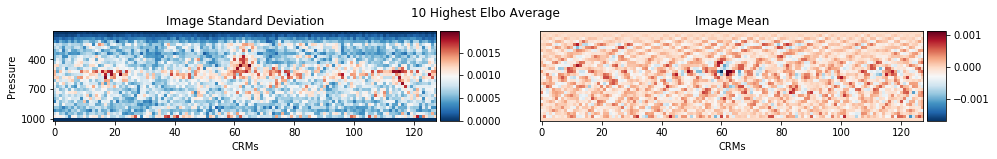

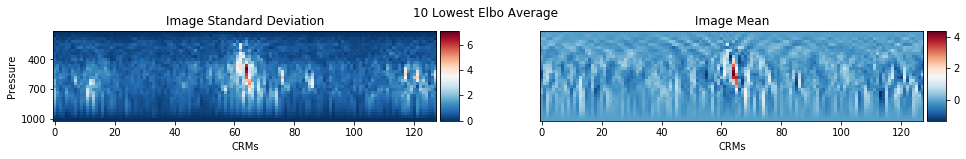

In [11]:
latent_space_analysis(Unlikely_Images, "10 Highest Elbo Average", idn)

latent_space_analysis(Likely_Images, "10 Lowest Elbo Average", idn)

In [14]:
def plot_generator_paper(sample, X, Z, count):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-6.5, vmax=6.5)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [15]:
others = netCDF4.Dataset("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
levs = np.array(others.variables['lev'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

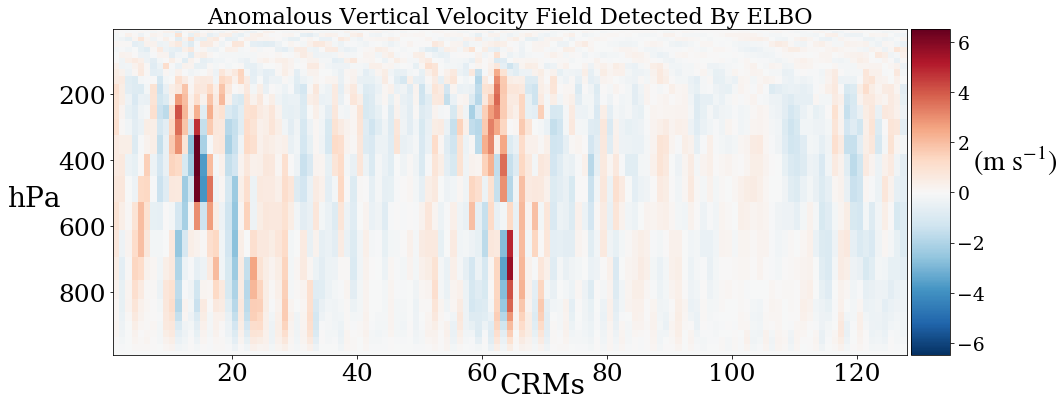

In [16]:
#plot_generator_paper(Test_Images[likely[i],:,:], 9)
plot_generator_paper(Test_Images[likely[9],:,:], Xs, Zs, 9)

In [15]:
def plot_generator(sample, count):
    cmap="RdBu_r"
    fig, ax = plt.subplots( figsize=(16,12))
    cs0 = ax.imshow(sample, cmap=cmap)
    ax.set_title("Number " +str(i+1) +" Most Anomalous Vertical Velocity Field")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs")
    ax.set_ylabel("Pressure")
    y_ticks = np.arange(1150, 0, -150)
    ax.set_yticklabels(y_ticks)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs0, cax=cax)
    
#plot_generator(test[0,:,:])

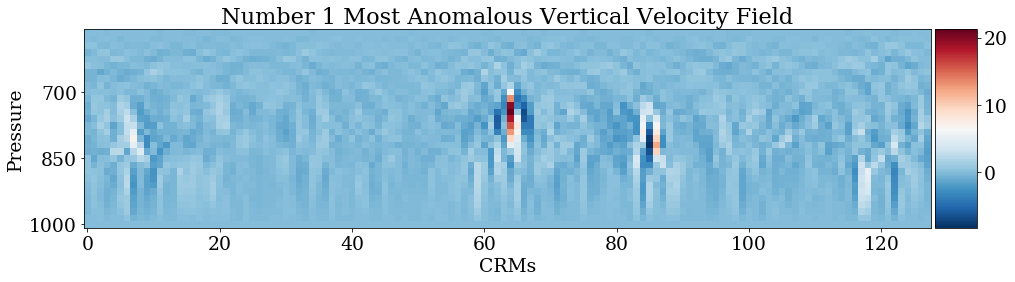

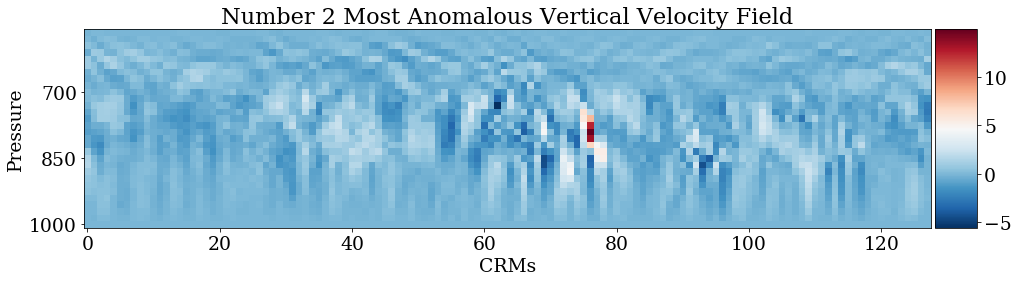

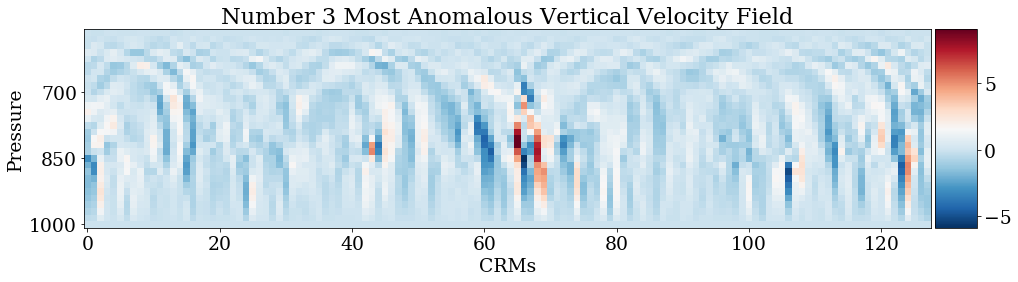

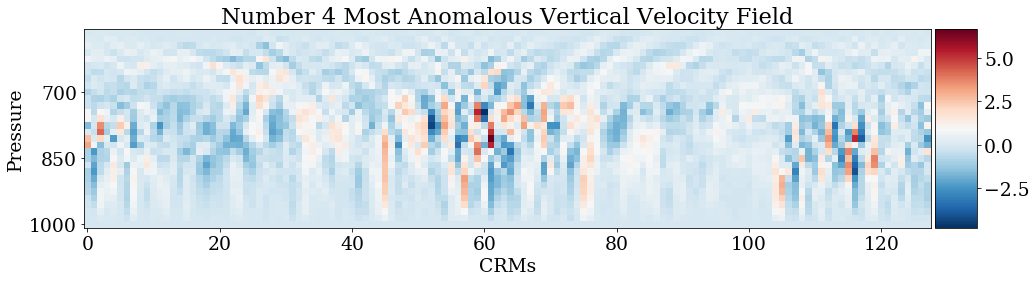

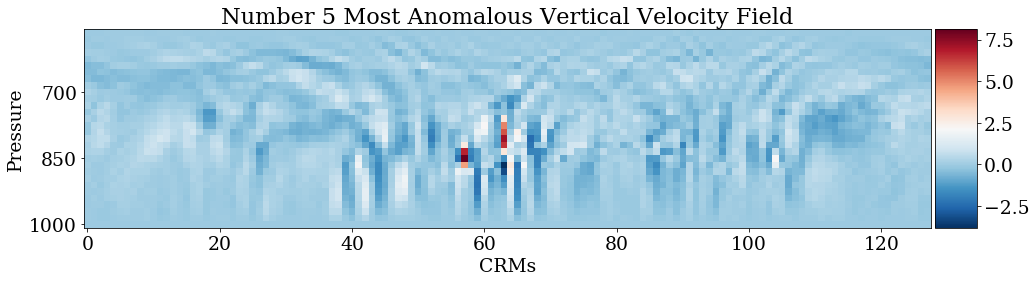

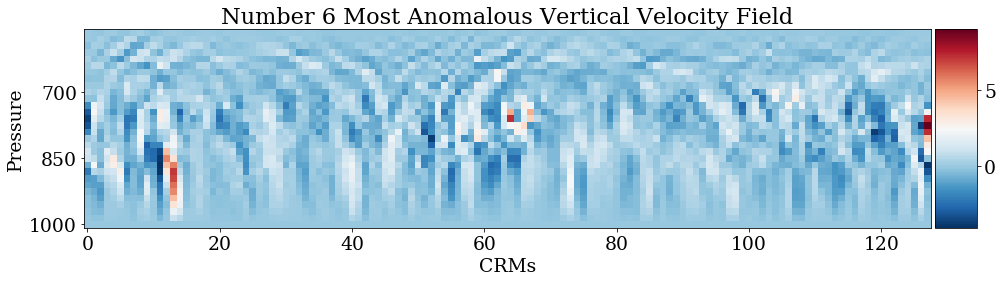

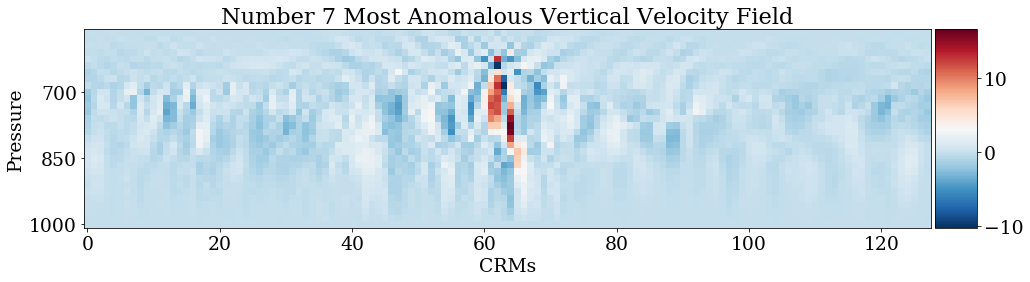

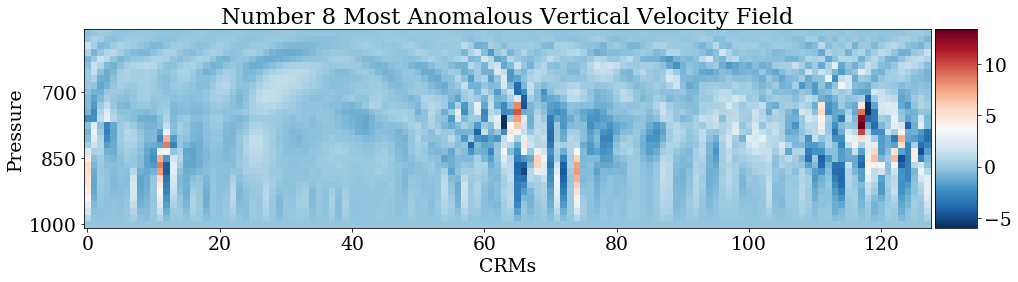

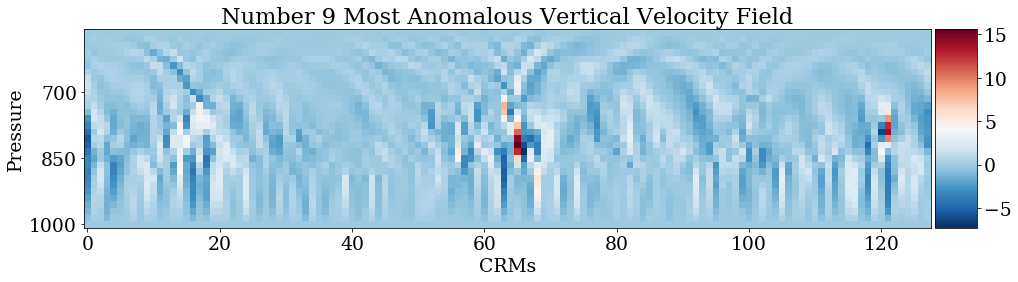

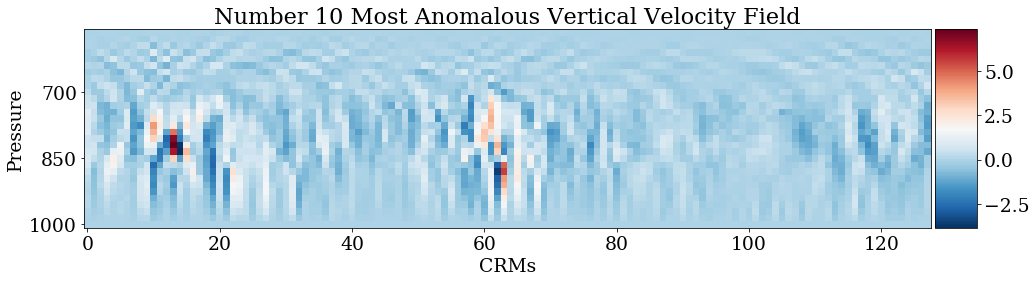

In [16]:
for i in range(len(likely)):
    plot_generator(Test_Images[likely[i],:,:], i)

In [17]:
def plot_generator(sample, count):
    cmap="RdBu_r"
    fig, ax = plt.subplots( figsize=(16,12))
    cs0 = ax.imshow(sample, cmap=cmap)
    ax.set_title("Anomalous Vertical Velocity Field")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs")
    ax.set_ylabel("Pressure")
    y_ticks = np.arange(1150, 0, -150)
    ax.set_yticklabels(y_ticks)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(cs0, cax=cax)
    
#plot_generator(test[0,:,:])

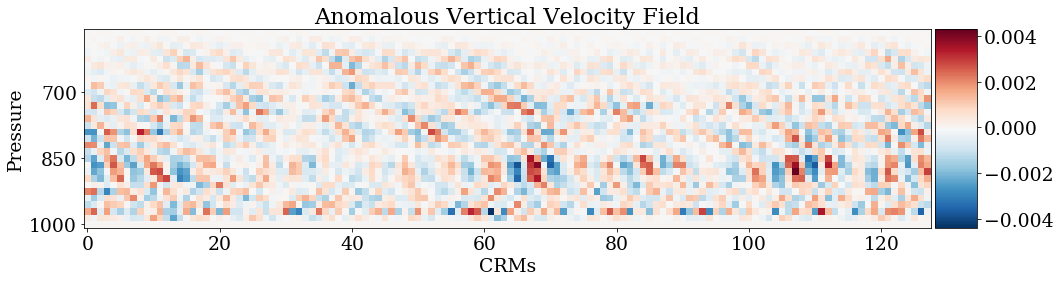

In [18]:
plot_generator(Test_Images[unlikely[i],:,:], 19)

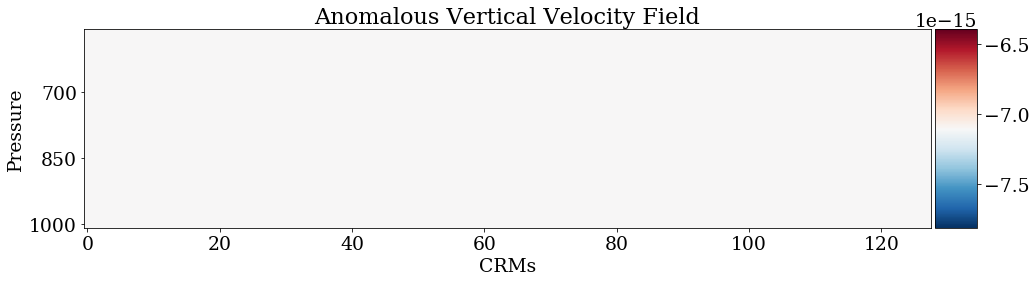

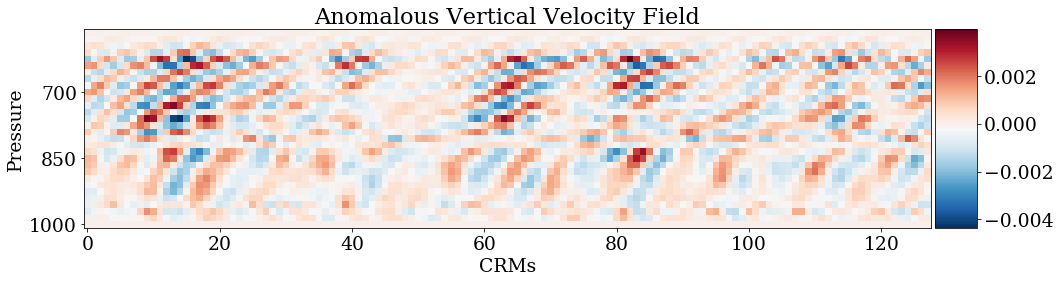

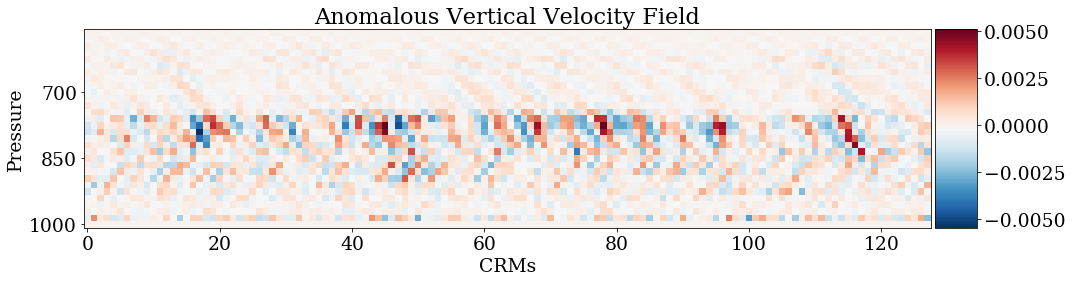

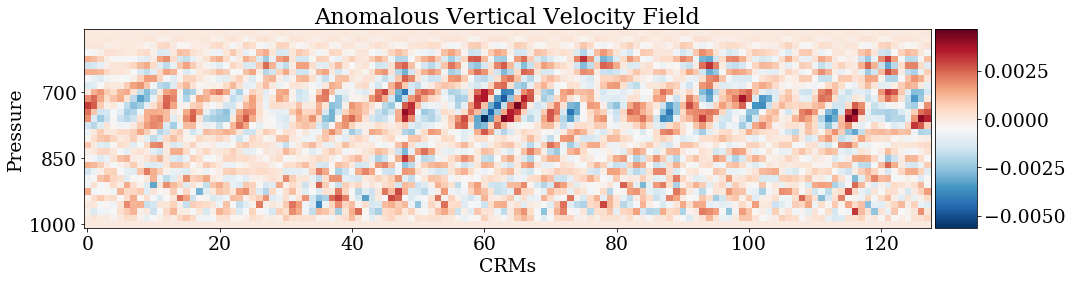

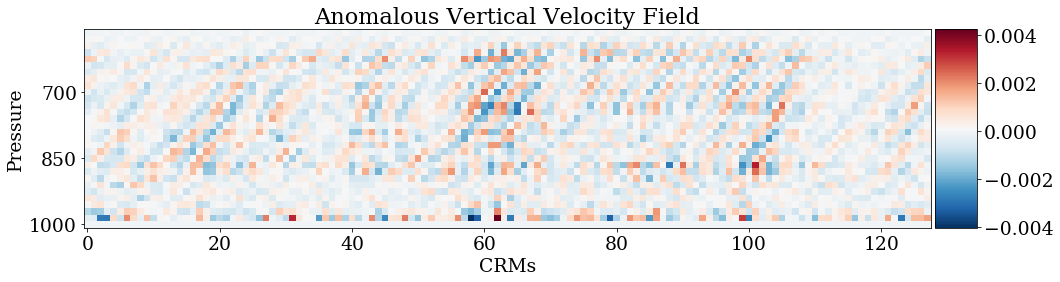

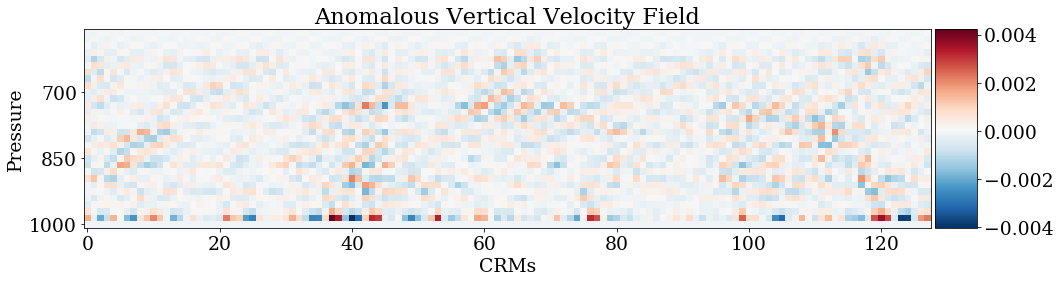

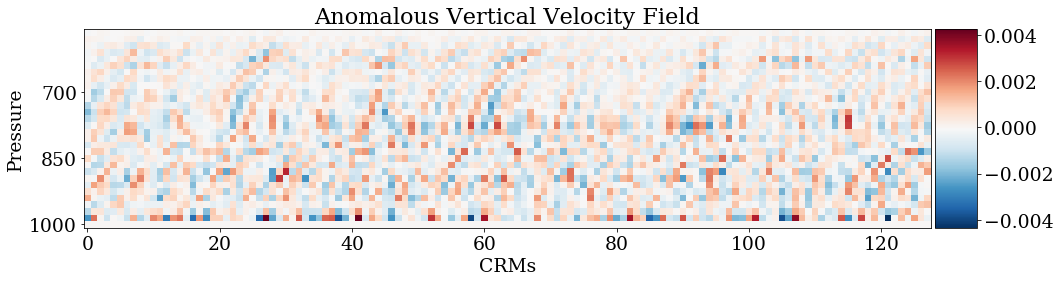

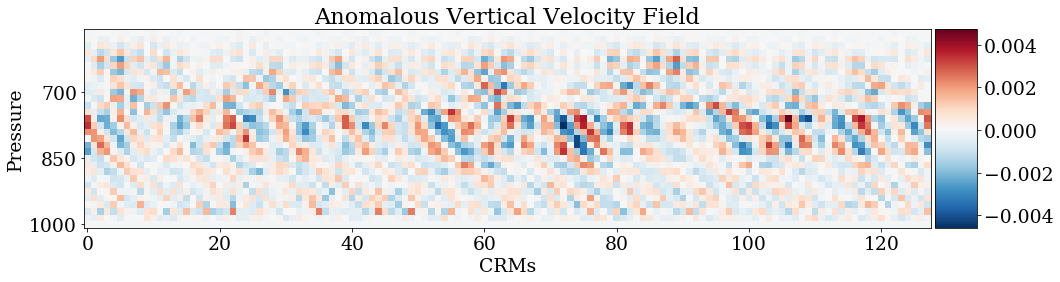

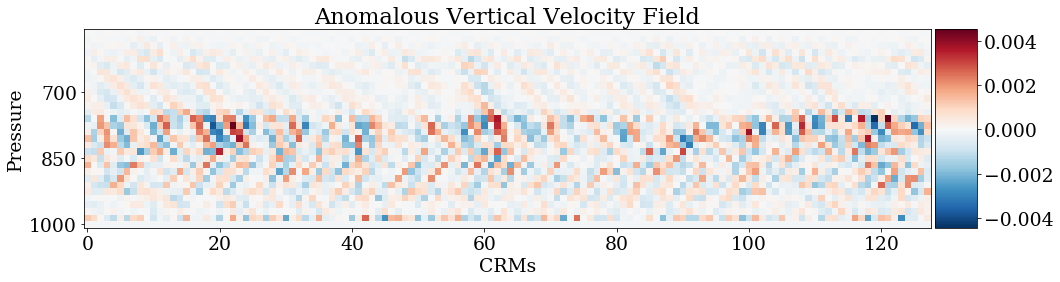

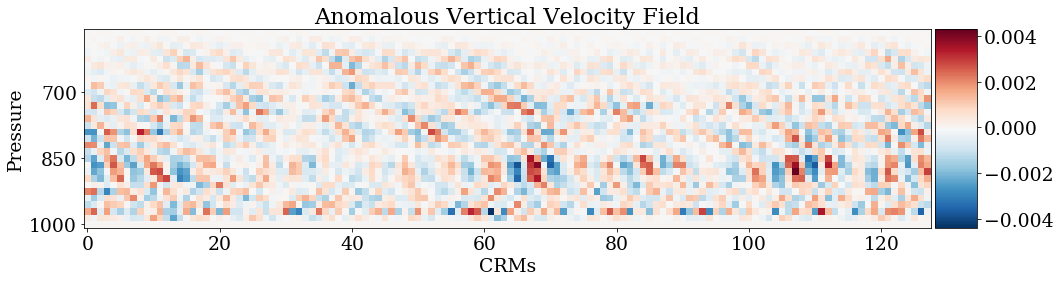

In [19]:
for i in range(len(likely)):
    plot_generator(Test_Images[unlikely[i],:,:], i)